In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import data

maxlon = 171

Tok1 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo1_vSept16.csv', sep = ',')
Tok1['density'] = sw.rho(Tok1['S'].values,Tok1['T'].values,0)
Tok1 = Tok1[(Tok1['Lon']>110) & (Tok1['Lon']<maxlon)]

Tok2 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo2_vSept16.csv', sep = ',')
Tok2['density'] = sw.rho(Tok2['S'].values,Tok2['T'].values,0)
Tok2 = Tok2[(Tok2['Lon']>110) & (Tok2['Lon']<maxlon)]

Tok3 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo3_vSept16.csv', sep = ',')
Tok3['density'] = sw.rho(Tok3['S'].values,Tok3['T'].values,0)
Tok3 = Tok3[(Tok3['Lon']>110) & (Tok3['Lon']<maxlon)]

Tian = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tianjin2_vSept16.csv', sep = ',')
Tian['density'] = sw.rho(Tian['S'].values,Tian['T'].values,0)
Tian = Tian[(Tian['Lon']>110) & (Tian['Lon']<maxlon)]

print Tian.columns

Index([u'Timestamp', u'Lat', u'Lon', u'S', u'T', u'Fluo', u'TrueO2Ar',
       u'O2Arsat', u'O2Arbiosat', u'MLD (WOA13)', u'Wkn', u'Air-sea flux',
       u'density'],
      dtype='object')


['../data/dt_global_allsat_msla_h_20110519_20140106.nc', '../data/dt_global_allsat_msla_h_20110520_20140106.nc', '../data/dt_global_allsat_msla_h_20110923_20140106.nc', '../data/dt_global_allsat_msla_h_20110924_20140106.nc', '../data/dt_global_allsat_msla_h_20110925_20140106.nc', '../data/dt_global_allsat_msla_h_20120727_20140106.nc', '../data/dt_global_allsat_msla_h_20120728_20140106.nc']


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


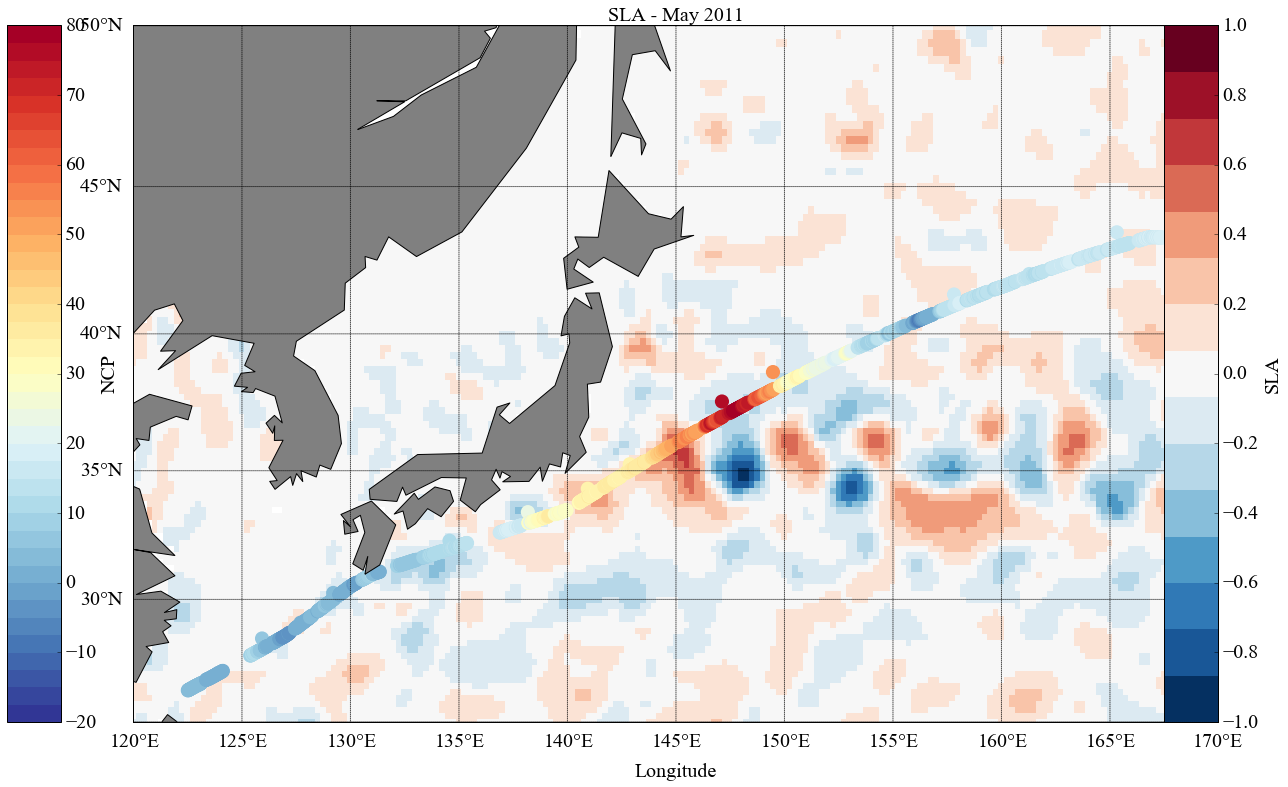

In [3]:
# import SSH data

files = glob.glob('../data/*.nc')
print files

Tok1_SSH = Dataset(files[0], mode='r')
sla = Tok1_SSH.variables['sla'][:]
lons = Tok1_SSH.variables['lon'][:]
lats = Tok1_SSH.variables['lat'][:]

Tok1_SSH.close()

fig0 = plt.figure(1, figsize=(18,12), dpi = 600)

palette = plt.get_cmap('RdBu_r', 15)
palette.set_bad('w',1.0)

palette2 = plt.get_cmap('RdYlBu_r', 40)

m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50.01,\
            llcrnrlon=120,urcrnrlon=170,lat_ts=0,resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

cs = m.pcolor(xi,yi,np.squeeze(sla), cmap = palette, vmin=-1, vmax = 1)

cbar = m.colorbar(cs, location='right', pad=1)
cbar.set_label('SLA', fontsize = 20)
cbar.ax.tick_params(labelsize=20)

xmT1, ymT1 = m(Tok1['Lon'].values, Tok1['Lat'].values)

cncp = m.scatter(xmT1, ymT1, s = 200, c= Tok1['Air-sea flux'].values, vmin=-20, vmax = 80,cmap = palette2, lw=0)#, label = 'May 2011')

cbar2 = m.colorbar(cncp, location='left', pad = 1)
cbar2.set_label('NCP', fontsize=20)
cbar2.ax.tick_params(labelsize=20)

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0], fontsize=20)
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1], fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xlabel('Longitude', fontsize = 20, labelpad = 40)
plt.ylabel('Latitude', fontsize = 20, labelpad = 70)

# Add Title
plt.title('SLA - May 2011', fontsize = 20)

plt.show()

fig0.savefig('../figures/NCP_SLA_May11.png', bbox_inches='tight', dpi=600)

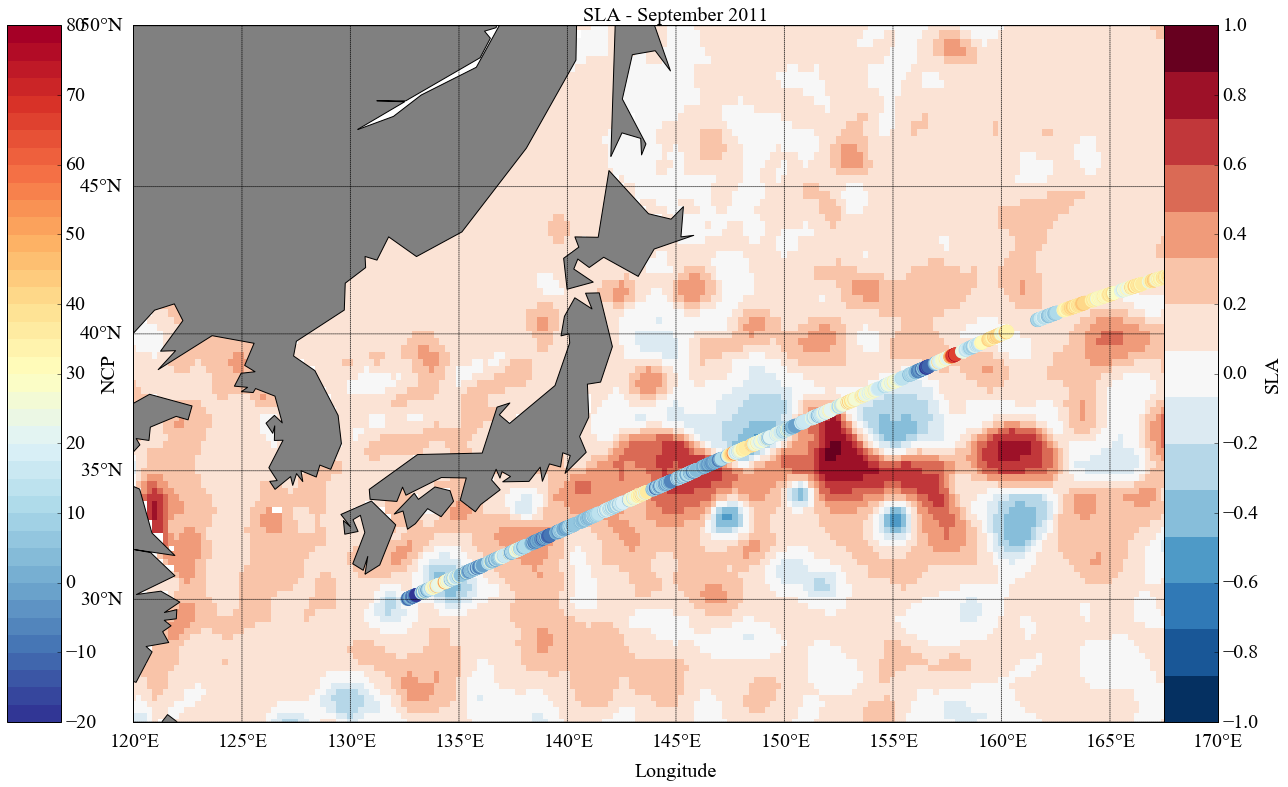

In [4]:
Tok3_SSH = Dataset(files[2], mode='r')
sla = Tok3_SSH.variables['sla'][:]
lons = Tok3_SSH.variables['lon'][:]
lats = Tok3_SSH.variables['lat'][:]

Tok3_SSH.close()

fig1 = plt.figure(1, figsize=(18,12), dpi = 600)

palette = plt.get_cmap('RdBu_r', 15)
palette.set_bad('w',1.0)

palette2 = plt.get_cmap('RdYlBu_r', 40)

m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50.01,\
            llcrnrlon=120,urcrnrlon=170,lat_ts=0,resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

cs = m.pcolor(xi,yi,np.squeeze(sla), cmap = palette, vmin=-1, vmax = 1)

cbar = m.colorbar(cs, location='right', pad=1)
cbar.set_label('SLA', fontsize = 20)
cbar.ax.tick_params(labelsize=20)


xmT1, ymT1 = m(Tok3['Lon'].values, Tok3['Lat'].values)

cncp = m.scatter(xmT1, ymT1, s = 200, c= Tok3['Air-sea flux'].values, vmin=-20, vmax = 80,cmap = palette2, lw=0)#, label = 'May 2011')

cbar2 = m.colorbar(cncp, location='left', pad = 1)
cbar2.set_label('NCP', fontsize=20)
cbar2.ax.tick_params(labelsize=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xlabel('Longitude', fontsize = 20, labelpad = 40)
plt.ylabel('Latitude', fontsize = 20, labelpad = 70)

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0], fontsize=20)
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1], fontsize=20)


# Add Title
plt.title('SLA - September 2011', fontsize = 20)

plt.show()

fig1.savefig('../figures/NCP_SLA_Sept11.png', bbox_inches='tight', dpi=600)

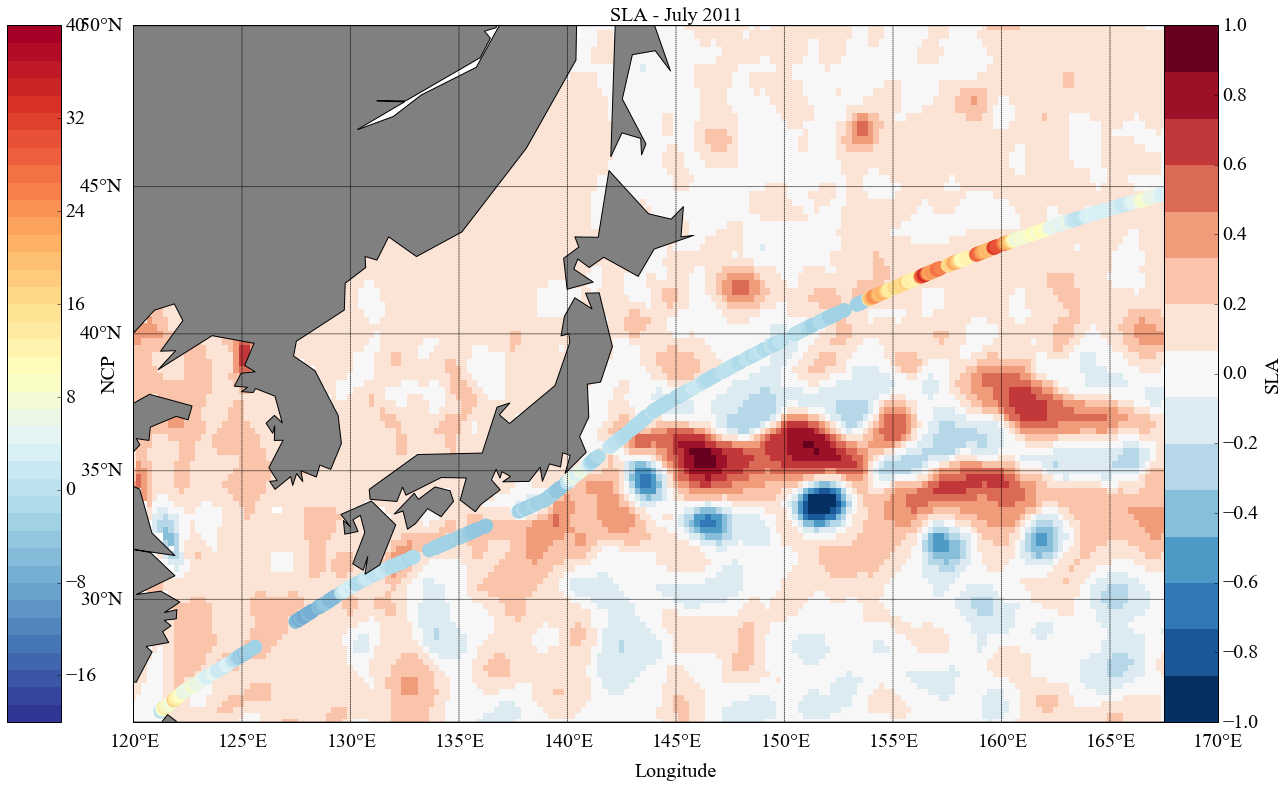

In [7]:
T_SSH = Dataset(files[5], mode='r')
sla = T_SSH.variables['sla'][:]
lons = T_SSH.variables['lon'][:]
lats = T_SSH.variables['lat'][:]

T_SSH.close()

fig2 = plt.figure(1, figsize=(18,12), dpi = 600)

palette = plt.get_cmap('RdBu_r', 15)
palette.set_bad('w',1.0)

palette2 = plt.get_cmap('RdYlBu_r', 40)

m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50.01,\
            llcrnrlon=120,urcrnrlon=170,lat_ts=0,resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

cs = m.pcolor(xi,yi,np.squeeze(sla), cmap = palette, vmin=-1, vmax = 1)

cbar = m.colorbar(cs, location='right', pad=1)
cbar.set_label('SLA', fontsize = 20)
cbar.ax.tick_params(labelsize=20)


xmT1, ymT1 = m(Tian['Lon'].values, Tian['Lat'].values)

cncp = m.scatter(xmT1, ymT1, s = 200, c= Tian['Air-sea flux'].values, vmin=-20, vmax = 40,cmap = palette2, lw=0)#, label = 'May 2011')

cbar2 = m.colorbar(cncp, location='left', pad = 1)
cbar2.set_label('NCP', fontsize=20)
cbar2.ax.tick_params(labelsize=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xlabel('Longitude', fontsize = 20, labelpad = 40)
plt.ylabel('Latitude', fontsize = 20, labelpad = 70)

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0], fontsize=20)
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1], fontsize=20)

# Add Title
plt.title('SLA - July 2011', fontsize = 20)

plt.show()

fig2.savefig('../figures/NCP_SLA_July12.png', bbox_inches='tight', dpi=600)

In [6]:
print files[5]

../data/dt_global_allsat_msla_h_20120727_20140106.nc
